# Recommender Systems - Task 2 - Reduced Data

We will a reduced filtered dataset in this playbook in terms of movies and users in order to discuss results and algorithm performance.

## Recommender Systems

We use the well-known MovieLens dataset (in this case the small version). You may find the following useful to obtain the data from the GroupLens repository, and to read it into a dataframe.

In [1]:
import os, requests
import numpy as np

mlSize = "ml-1m"
zipUrl = 'http://files.grouplens.org/datasets/movielens/'+mlSize+'.zip'
zipFile = 'data/'+mlSize+'.zip'
dataFile = zipFile
url = zipUrl
dataDir = 'data'
if not os.path.exists(dataDir):
    os.makedirs(dataDir)
if not os.path.isfile(zipFile):
  r = requests.get(zipUrl)
  with open(zipFile, 'wb') as f:
    f.write(r.content)

# Need to unzip the file to read its contents
import zipfile
with zipfile.ZipFile(zipFile,"r") as zip_ref:
  zip_ref.extractall(dataDir)


## TASK 2.1
__Task 2.1__: Read the `users.dat`, `movies.dat` and `ratings.dat` data files into data frames.

In [2]:
import pandas

users = pandas.read_csv('data/ml-1m/users.dat', sep='::',
                        engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip']).set_index('userid')

ratings = pandas.read_csv('data/ml-1m/ratings.dat', engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])

movies = pandas.read_csv('data/ml-1m/movies.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre']).set_index('movieid')

In [3]:
users.head()

,gender,age,occupation,zip
userid,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [4]:
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies.head()

,title,genre
movieid,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [6]:
# We get the number of movies and users:
n_movies = movies.shape[0]
n_users = users.shape[0]

In [7]:
n_movies, n_users

(3883, 6040)

## TASK 2.2
__Task 2.2__: Generate the distribution of ratings (number of user-movie ratings, per rating value).

In order to merge all of the desired information in a single dataframe, we can merge the two dataframes objects on the movieid column since it is common between the two dataframes. This will aid with overall interpretation.

In [8]:
movie_data = pandas.merge(ratings, movies, on='movieid')  
movie_data = pandas.merge(movie_data, users, on='userid')  

In [9]:
movie_data.head()  

,userid,movieid,rating,timestamp,title,genre,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


#### Filtering the datasets and creating the user_movie_rating distribution

I first generate the movie filter aggregate.

In [10]:
minMovieRatings = 1750

filterMovies = movie_data['movieid'].value_counts() > minMovieRatings
filterMovies = filterMovies[filterMovies].index.tolist()
len(filterMovies)

40

I next generate the user filter aggregate.

In [11]:
minUserRatings = 1750

filterUsers = movie_data['userid'].value_counts() > minUserRatings
filterUsers = filterUsers[filterUsers].index.tolist()
len(filterUsers)

2

I create the new dataframe distribution using the isin() filtering function. This allows me to apply both user and movie filters to my movie_data df and create user_movie_rating df.

In [12]:
movie_rating = movie_data["movieid"].isin(filterMovies) 
user_rating = movie_data["userid"].isin(filterUsers) 
user_movie_rating = movie_data[movie_rating & user_rating] 
user_movie_rating.head()

,userid,movieid,rating,timestamp,title,genre,gender,age,occupation,zip
126391,1680,1197,4,974832595,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,M,25,20,95380
126406,1680,1270,3,974832715,Back to the Future (1985),Comedy|Sci-Fi,M,25,20,95380
126407,1680,527,4,974711125,Schindler's List (1993),Drama|War,M,25,20,95380
126409,1680,1097,4,974712668,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,M,25,20,95380
126419,1680,2762,5,974710822,"Sixth Sense, The (1999)",Thriller,M,25,20,95380


## TASK 2.3

__Task 2.3__: Using the filtered ratings dataframe, count the ratings per User and plot this data in a histogram. You should do the same with the Movies and comment on the similarities and differences between the two distributions.

In [13]:
ratings_user_count = pandas.DataFrame(user_movie_rating.groupby('userid')['rating'].count())
ratings_user_count.head()

,rating
userid,
1680,37
4169,39


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118c53588>]],
      dtype=object)

<Figure size 576x432 with 0 Axes>

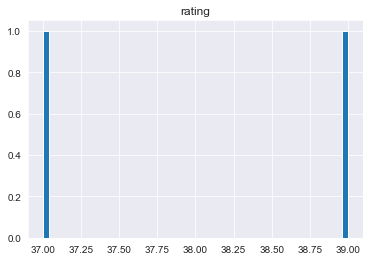

In [14]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_user_count.hist(bins=50)  

##### Result:
From the histogram and dataframe resultsets we can see that for the two users in the filtered dataset, we have 37 ratings for userid(1680) and 39 ratings for userid(4169).

In [15]:
ratings_movie_count = pandas.DataFrame(user_movie_rating.groupby('movieid')['rating'].count())
ratings_movie_count.head()

,rating
movieid,
1,1
34,2
50,2
110,2
260,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114038ac8>]],
      dtype=object)

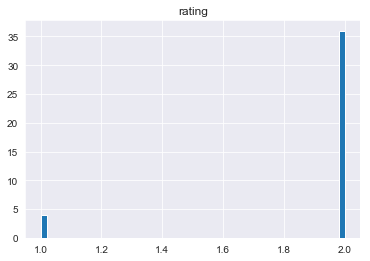

In [16]:
ratings_movie_count.hist(bins=50) 

##### Result:
From the histogram and dataframe resultsets we can see that for the movie / rating grouping, there are far more films with a two ratings on the film. This rating count, it should noted, is not the rating value of the movie, rather the count of times it was rated.

##### Similarities and Differences

From comparing the histograms for rating counts by userid and by movieid, the following comments can be made:
* Edcuated guesses can only be made from comparing the histograms as to which user provided which ratings.
* Most of the movies have received more than 2 ratings, fewer have received only one rating entry.

## TASK 2.4

__Task 2.4__: Repeat Task 2.3 above, but deriving the average ratings rather than their counts.

In [17]:
ratings_user_average = pandas.DataFrame(user_movie_rating.groupby('userid')['rating'].mean())
ratings_user_average.head()

,rating
userid,
1680,3.945946
4169,4.410256


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118dd9358>]],
      dtype=object)

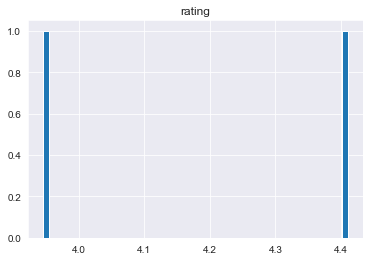

In [18]:
ratings_user_average.hist(bins=50) 

##### Result:
From the histogram and dataframe resultsets we can see that for the two users in the filtered dataset, we have an average rating of 3.94 ratings for userid(1680) and 4.41 ratings for userid(4169).

In [19]:
ratings_movie_average = pandas.DataFrame(user_movie_rating.groupby('movieid')['rating'].mean())
ratings_movie_average.head()

,rating
movieid,
1,4.0
34,3.5
50,5.0
110,2.5
260,3.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1190d2080>]],
      dtype=object)

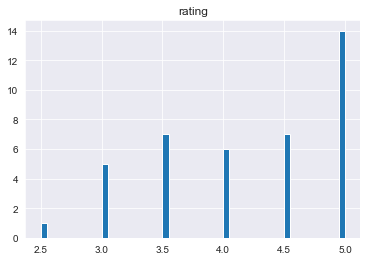

In [20]:
ratings_movie_average.hist(bins=50) 

##### Result:
From the histogram and dataframe resultsets we can see that for the movie / rating grouping, movie id(50) with a rating of 5 makes up the largest average followed next by 3.5 for id 34. Lets check what these films are:

In [21]:
user_movie_rating.loc[user_movie_rating['movieid'] == 50].head(1)

,userid,movieid,rating,timestamp,title,genre,gender,age,occupation,zip
126578,1680,50,5,974710590,"Usual Suspects, The (1995)",Crime|Thriller,M,25,20,95380


In [22]:
user_movie_rating.loc[user_movie_rating['movieid'] == 34].head(1)

,userid,movieid,rating,timestamp,title,genre,gender,age,occupation,zip
126672,1680,34,3,974711349,Babe (1995),Children's|Comedy|Drama,M,25,20,95380


##### Similarities and Differences
From comparing the histograms for average ratings by userid and by movieid, the following comments can be made:

* For the two users assessed in this average, there rating ranged between 3 and 4.4 on average. This almost aligns with the second average film rating of 3.5 and is just lower than the highest average of 5. 
* We have more results to assess for the film average, due to the dataset filtering than we do for the users average ratings.

## TASK 2.5

__Task 2.5__: Load the (filtered) movies ratings data from the dataframe we have been exploring into the preferred 3-column format used by the `scikit-suprise` package. Now benchmark the performance (in terms of RMS error, time to fit, and time to generate predictions for test data) of the `SVD()`, `SlopeOne()`, `NMF()`, `KNNBasic()` recommendation algorithms. Discuss the strengths and weaknesses of each algorithm, based on its benchmarked results.

In [23]:
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset
from surprise import SVD, SlopeOne, NMF, KNNBasic

reader = Reader()
data = Dataset.load_from_df(user_movie_rating[['userid', 'movieid', 'rating']], reader)

Next we loop over the algorithms and get the resulting benchmarks for each.
5-fold cross-validation was used to estimate the errors and their standard deviations was used on each algorithm.

In [24]:
for algo in [SVD(), SlopeOne(), NMF(), KNNBasic()]:
    cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1336  0.7357  0.8853  1.0385  1.0088  0.9604  0.1375  
MAE (testset)     0.8077  0.6785  0.6710  0.8776  0.9730  0.8016  0.1161  
Fit time          0.01    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8419  0.8093  1.3147  1.0704  0.9459  0.9964  0.1834  
MAE (testset)     0.6022  0.6746  0.9034  0.8202  0.7379  0.7477  0.1059  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (te

### SVD Results

#### Strengths
* Useful for achieving a minimal RMSE(Root Mean Square Error) result.
* Acts as a means of Dimensionality reduction similar in comparison to PCA which maps nicely with a collaborative filtering dataset such as the movie dataset.
* While the mean RMSE was 0.9604 and MAE was 0.8016, in comparison to the other algorithm results, this was the best performing of the four.
* Fit time was very optimal at 0.00 likely due to the reduced data set.
* Test time was very optimal at 0.00 likely due to the reduced data set.

#### Weaknesses
* The main drawback of SVD is that there is little to no explanation to the reason that we recommend an item to an user. This can be a huge problem if users are eager to know why a specific item is recommended to them.
* Requires care when used with missing data. Gradient Approach is better suited to missing data handling.
* Mean RMSE was 0.9604 which is quite high and not considered a successsful result for prediction errors. 
* Mean MAE was 0.8016 which again is quite high and not considered a successsful result for prediction errors, although we did see a reduction of 16 percent in comparison to RMSE here.

### SlopeOne Results

#### Strengths
* SlopeOne is a straightforward implementation of the SlopeOne algorithm.
* While the mean RMSE was 0.9964 and MAE was 0.7477, in comparison to the other algorithm results, this was the best second performing of the four, next after SVD.
* Fit time was very optimal at 0.00 likely due to the reduced data set.
* Test time was very optimal at 0.00 likely due to the reduced data set.
* While it still requires a huge amount of preprocessing to compute values comparing each item in the dataset with each other item, it is generally faster than other approaches, as it uses half the number of predictor regressions. 
* Allows for making certain predictions about user-rating similarity which is very useful.

#### Weaknesses
* Mean RMSE was 0.9964 which is quite high and not considered a successsful result for prediction errors.
* Mean MAE was 0.7477 which again is quite high and not considered a successsful result for prediction errors, although we did see a reduction of 25 percent in comparison to RMSE here.
* Has known scalability issues, so larger datasets may not perform as well. This is not as noticeable here, but will be checked on the extended resultset.
* Works well for ratings but not as well for binary data (yes or no).

### NMF Results

#### Strengths
* NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar to SVD. 
* Test time was very optimal at 0.00 likely due to the reduced data set.

#### Weaknesses
* Fit time was slightly less performant at 0.01.
* Mean RMSE was 1.3190 which was the highest in this category and not considered a successsful result for prediction errors.
* Mean MAE was 1.0826 which again was the highest in this category and not considered a successsful result for prediction errors, although we did see a reduction of almost 25 percent in comparison to RMSE here.
* Overall NMF performed the worst of the four algorithms.
* The NMF algorithm may have problems if the values are not independent. This may cause difficulties in more complex datasets.

### KNNBasic Results

#### Strengths
* Simplistic, basic collaborative filtering algorithm.
* Uses the K-nearest neighbors approach which is easy to understand from working on other data mining categories.
* Fit time was very optimal at 0.00 likely due to the reduced data set.
* Test time was very optimal at 0.00 likely due to the reduced data set.

#### Weaknesses
* Mean RMSE was 1.0854 which was the highest in this category and not considered a successsful result for prediction errors.
* Mean MAE was 0.7595 which again was the highest in this category and not considered a successsful result for prediction errors, although we did see a significant reduction of almost 30 percent in comparison to RMSE here.

### Overall Algorithm Winner = SVD